# **Taller No. 3 Redes GAN**

In [ ]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# **Parte 1: Implementación de la GAN**

1. Preprocesamiento: Utilizando el conjunto de datos MNIST realiza el preprocesamiento necesario
para escalar los valores de pixeles entre -1 y 1

In [ ]:
# cargar los datos

(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data() # estamos importando los datos y guardando uno de los datos


11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32') # redimensionando las imagenes los arreglos, el 28 dimension, y el 1 canal de la imagen, y el float es para hacer operaciones con ellos


In [ ]:
train_images = (train_images - 127.5) / 127.5 # Escala a valores entre -1 y 1 dad en el taller y se utiliza para los datos que van cercanos a cero y es la mas conocidad para las imagenes

2. . Definición del generador y el discriminador: Definir las arquitecturas del generador y del
discriminador. (Utilizando métodos que permitan fácilmente justificar la elección de cada
arquitectura)

In [ ]:
from tensorflow.python.ops.gen_data_flow_ops import padding_fifo_queue

# Definición del generador

def buil_generator(latent_dim):
  model = models.Sequential()
  model.add(layers.Dense(7 * 7 * 128, input_dim=latent_dim)) # imagenes dimension escala de grises 128 canales de la imagen y 7*7 dimension
  model.add(layers.LeakyReLU(alpha=0.2)) # nueva capa con funcion de altivacion con una pendiente que va a tener la parte negativa de la funcion
  model.add(layers.Reshape((7, 7, 128))) # Capa de redimensionamiento de los canales
  model.add(layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding = 'same')) # Conv2DTranspose aumenta la resolución espacial para que la imagen de salida sea igual a la que la voy a comparar
  # y el 64 significa que tiene 64 neuronas, y el 4, 4 quierde decir que va a tomar un filtro de 4 * 4 y los strides define como se va a moder y a posicionar el centro y paddinn es que mantenga la forma
  model.add(layers.LeakyReLU(alpha=0.2))
  model.add(layers.Conv2DTranspose(1, (4, 4), strides=(2, 2), padding = 'same', activation='tanh')) # definir funcion tangente hiperbolica
  # Usa una funcion tangente y sale con una neurona
  return model

  # las capas intermedio es para que noo se pierda información


In [ ]:
models

<module 'keras.api._v2.keras.models' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/models/__init__.py'>

In [ ]:
# Definición del discriminador

def buil_discriminator():
  model = models.Sequential()
  model.add(layers.Conv2D(64,(3, 3), strides=(2, 2), padding = 'same', input_shape = (28, 28, 1)))
  model.add(layers.LeakyReLU(alpha = 0.2))
  model.add(layers.Dropout(0.4))
  model.add(layers.Conv2D(128, (3, 3), strides = (2, 2), padding = 'same'))
  model.add(layers.LeakyReLU(alpha = 0.2)) # nueva capa con funcion de altivacion con una pendiente que va a tener la parte negativa de la funcion
  model.add(layers.Dropout(0.4)) # desconecta un porcentaje de neuronas hasta conseguir valor optimo y para no generar un sobreajuste
  model.add(layers.Flatten()) # Hace el aplanamiento y lo vuelve un unico vector
  model.add(layers.Dense(1, activation = 'sigmoid')) # sigmoid cuando hago clasificador porque tiene a uno o otro
  # sale una probabilidad de que este parecida al generador esta la imagen y genera la función de perdida
  return model

3. Implementación de la GAN: Construya la red GAN combinando el generador y el discriminador,
utilizando las funciones de perdida y optimizador adecuados.

In [ ]:
# Definición de las dimensiones
latent_dim = 100

In [ ]:
# Construcción y compilación del discriminador
discriminator = buil_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # valor de error y perdida binaria
#loss binario para sabar la perdida y optimizador adam para ptimizar los parametros de la red
# acuracy que tan preciso es para clasificar

In [ ]:
# Construccion del generador
generator = buil_generator(latent_dim)

In [ ]:
#from keras.utils.sidecar_evaluator import optimizer
# Construcción de la red GAN
discriminator.trainable = False # congele la configuracion del discriminador
gan_input = tf.keras.Input(shape = (latent_dim,)) # entrada del modelo, ruido de la entrada
x = generator(gan_input) # a la capa de entrada del discriminador queda el espacio latente
gan_output = discriminator(x) # lo que sale del generador es x y entra al discriminador
gan = tf.keras.Model(gan_input, gan_output) # crear el modelo del espacio latente y la salida es del discriminador
gan.compile(loss='binary_crossentropy', optimizer='adam')

4. Entrenamiento: Entrene la red durante 10000 épocas y utilice un espacio latente igual a 100.

In [ ]:
# entrenamiento

batch_size = 128 # tamaño de lotes para entrenamiento
epochs = 10000 # luego cambiarlo a 10.000
sample_interval = 125 # luego cambiarlo a 1.000 y de acuerdo a mi codigo estudiantil

4/4 [==============================] - 11s 11ms/step
Epoch 0, D Loss: 0.7049466967582703, G Loss: 0.6861426830291748
4/4 [==============================] - 0s 2ms/step


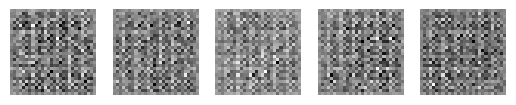

4/4 [==============================] - 0s 3ms/step
Epoch 125, D Loss: 0.13782304897904396, G Loss: 6.051098346710205
4/4 [==============================] - 0s 2ms/step


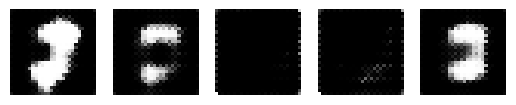

4/4 [==============================] - 0s 3ms/step
Epoch 250, D Loss: 0.040282128378748894, G Loss: 7.065915584564209
4/4 [==============================] - 0s 3ms/step


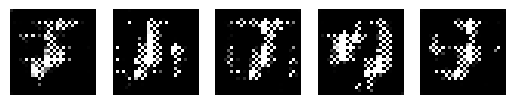

4/4 [==============================] - 0s 3ms/step
Epoch 375, D Loss: 0.09423597529530525, G Loss: 6.335491180419922
4/4 [==============================] - 0s 3ms/step


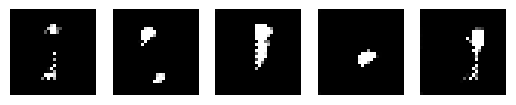

4/4 [==============================] - 0s 2ms/step
Epoch 500, D Loss: 0.360122486948967, G Loss: 3.964933395385742
4/4 [==============================] - 0s 3ms/step


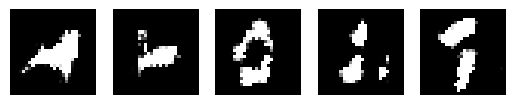

4/4 [==============================] - 0s 2ms/step
Epoch 625, D Loss: 0.14108584076166153, G Loss: 3.923006534576416
4/4 [==============================] - 0s 4ms/step


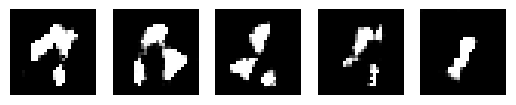

4/4 [==============================] - 0s 3ms/step
Epoch 750, D Loss: 0.12951168417930603, G Loss: 3.883673906326294
4/4 [==============================] - 0s 3ms/step


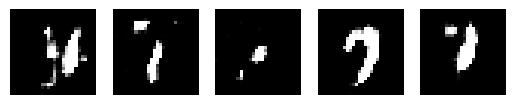

4/4 [==============================] - 0s 3ms/step
Epoch 875, D Loss: 0.5365418195724487, G Loss: 2.9092934131622314
4/4 [==============================] - 0s 3ms/step


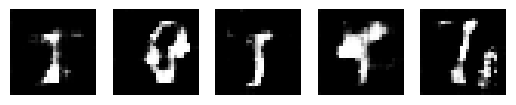

4/4 [==============================] - 0s 3ms/step
Epoch 1000, D Loss: 0.257171094417572, G Loss: 2.918541431427002
4/4 [==============================] - 0s 3ms/step


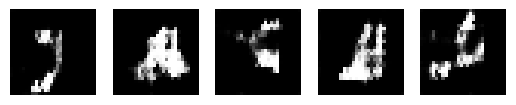

4/4 [==============================] - 0s 3ms/step
Epoch 1125, D Loss: 0.4540274739265442, G Loss: 1.8112040758132935
4/4 [==============================] - 0s 3ms/step


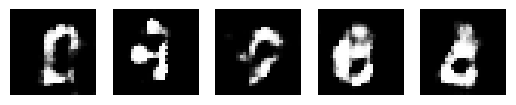

4/4 [==============================] - 0s 3ms/step
Epoch 1250, D Loss: 0.23634082823991776, G Loss: 2.379757881164551
4/4 [==============================] - 0s 3ms/step


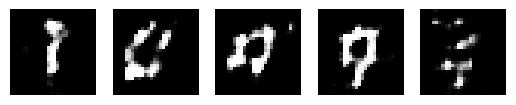

4/4 [==============================] - 0s 2ms/step
Epoch 1375, D Loss: 0.4640413075685501, G Loss: 1.5097520351409912
4/4 [==============================] - 0s 2ms/step


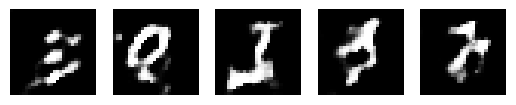

4/4 [==============================] - 0s 3ms/step
Epoch 1500, D Loss: 0.4808851629495621, G Loss: 1.4858590364456177
4/4 [==============================] - 0s 3ms/step


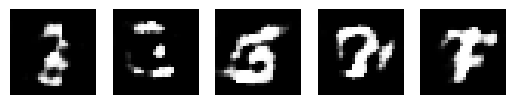

4/4 [==============================] - 0s 3ms/step
Epoch 1625, D Loss: 0.37147101759910583, G Loss: 2.117518663406372
4/4 [==============================] - 0s 3ms/step


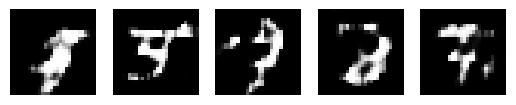

4/4 [==============================] - 0s 4ms/step
Epoch 1750, D Loss: 0.47269420325756073, G Loss: 1.8654353618621826
4/4 [==============================] - 0s 3ms/step


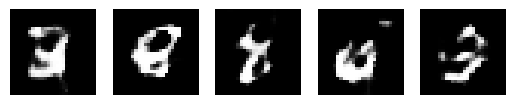

4/4 [==============================] - 0s 4ms/step
Epoch 1875, D Loss: 0.39632605016231537, G Loss: 1.7377527952194214
4/4 [==============================] - 0s 5ms/step


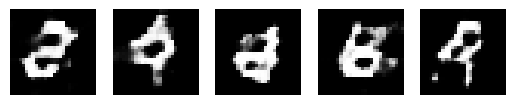

4/4 [==============================] - 0s 3ms/step
Epoch 2000, D Loss: 0.35130642354488373, G Loss: 2.3903520107269287
4/4 [==============================] - 0s 3ms/step


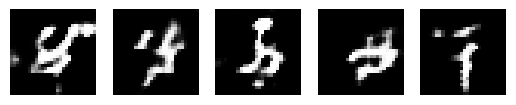

4/4 [==============================] - 0s 4ms/step
Epoch 2125, D Loss: 0.5186186730861664, G Loss: 1.5833022594451904
4/4 [==============================] - 0s 4ms/step


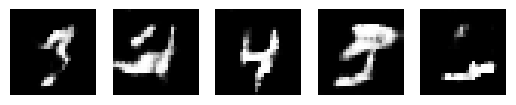

4/4 [==============================] - 0s 4ms/step
Epoch 2250, D Loss: 0.41571594774723053, G Loss: 1.876132607460022
4/4 [==============================] - 0s 3ms/step


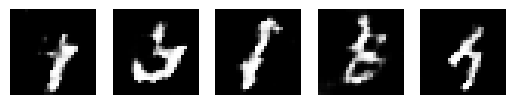

4/4 [==============================] - 0s 3ms/step
Epoch 2375, D Loss: 0.5396986603736877, G Loss: 1.725471019744873
4/4 [==============================] - 0s 3ms/step


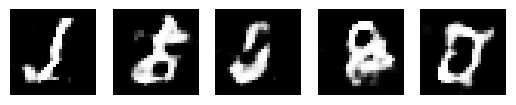

4/4 [==============================] - 0s 4ms/step
Epoch 2500, D Loss: 0.5155150890350342, G Loss: 1.7101893424987793
4/4 [==============================] - 0s 4ms/step


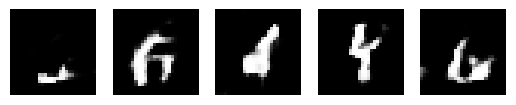

4/4 [==============================] - 0s 4ms/step
Epoch 2625, D Loss: 0.5183991640806198, G Loss: 1.734897494316101
4/4 [==============================] - 0s 3ms/step


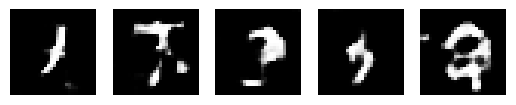

4/4 [==============================] - 0s 4ms/step
Epoch 2750, D Loss: 0.43319787085056305, G Loss: 1.631587028503418
4/4 [==============================] - 0s 3ms/step


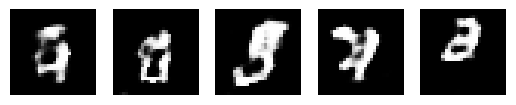

4/4 [==============================] - 0s 3ms/step
Epoch 2875, D Loss: 0.5288562476634979, G Loss: 1.616256594657898
4/4 [==============================] - 0s 5ms/step


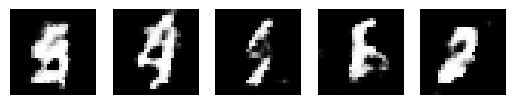

4/4 [==============================] - 0s 4ms/step
Epoch 3000, D Loss: 0.5438698828220367, G Loss: 1.4685285091400146
4/4 [==============================] - 0s 3ms/step


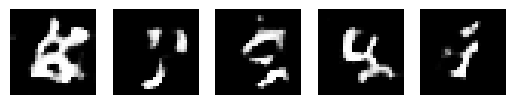

4/4 [==============================] - 0s 4ms/step
Epoch 3125, D Loss: 0.4431680738925934, G Loss: 1.5634926557540894
4/4 [==============================] - 0s 3ms/step


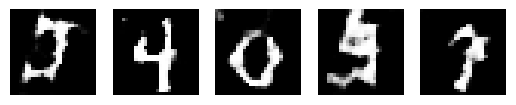

4/4 [==============================] - 0s 3ms/step
Epoch 3250, D Loss: 0.5653622448444366, G Loss: 1.728557825088501
4/4 [==============================] - 0s 3ms/step


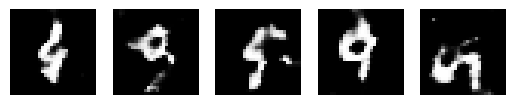

4/4 [==============================] - 0s 4ms/step
Epoch 3375, D Loss: 0.49355432391166687, G Loss: 1.5049257278442383
4/4 [==============================] - 0s 4ms/step


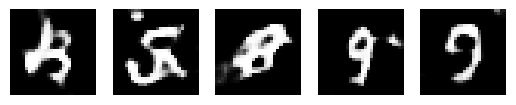

4/4 [==============================] - 0s 4ms/step
Epoch 3500, D Loss: 0.5708648264408112, G Loss: 1.527693748474121
4/4 [==============================] - 0s 4ms/step


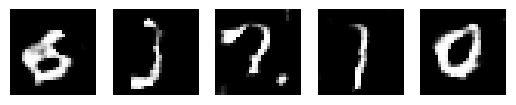

4/4 [==============================] - 0s 4ms/step
Epoch 3625, D Loss: 0.5000052154064178, G Loss: 1.8466691970825195
4/4 [==============================] - 0s 4ms/step


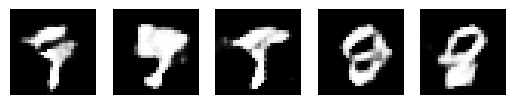

4/4 [==============================] - 0s 4ms/step
Epoch 3750, D Loss: 0.5535040646791458, G Loss: 1.5349421501159668
4/4 [==============================] - 0s 4ms/step


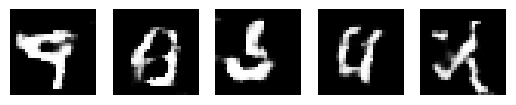

4/4 [==============================] - 0s 3ms/step
Epoch 3875, D Loss: 0.4474286586046219, G Loss: 2.0598580837249756
4/4 [==============================] - 0s 8ms/step


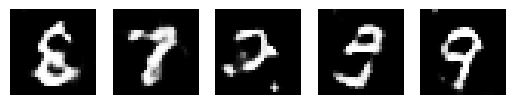

4/4 [==============================] - 0s 3ms/step
Epoch 4000, D Loss: 0.4811672121286392, G Loss: 1.5030832290649414
4/4 [==============================] - 0s 4ms/step


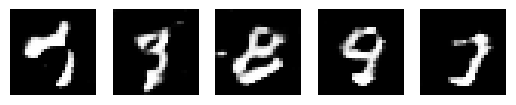

4/4 [==============================] - 0s 4ms/step
Epoch 4125, D Loss: 0.5408638715744019, G Loss: 1.8332035541534424
4/4 [==============================] - 0s 6ms/step


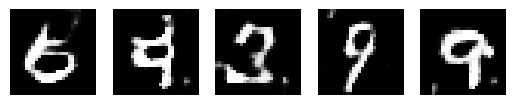

4/4 [==============================] - 0s 6ms/step
Epoch 4250, D Loss: 0.4849921762943268, G Loss: 1.6621406078338623
4/4 [==============================] - 0s 3ms/step


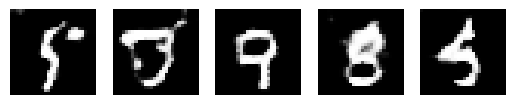

4/4 [==============================] - 0s 4ms/step
Epoch 4375, D Loss: 0.41447094082832336, G Loss: 1.7090232372283936
4/4 [==============================] - 0s 4ms/step


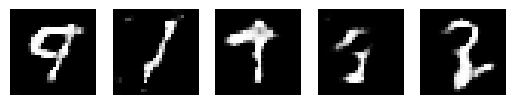

4/4 [==============================] - 0s 4ms/step
Epoch 4500, D Loss: 0.5723899900913239, G Loss: 1.5722612142562866
4/4 [==============================] - 0s 4ms/step


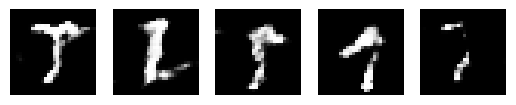

4/4 [==============================] - 0s 4ms/step
Epoch 4625, D Loss: 0.46269139647483826, G Loss: 1.7932595014572144
4/4 [==============================] - 0s 5ms/step


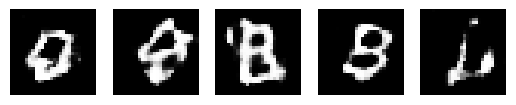

4/4 [==============================] - 0s 4ms/step
Epoch 4750, D Loss: 0.5314359068870544, G Loss: 1.7257192134857178
4/4 [==============================] - 0s 6ms/step


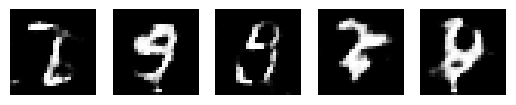

4/4 [==============================] - 0s 4ms/step
Epoch 4875, D Loss: 0.4900878518819809, G Loss: 1.6200823783874512
4/4 [==============================] - 0s 3ms/step


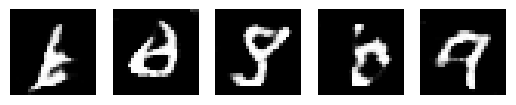

4/4 [==============================] - 0s 4ms/step
Epoch 5000, D Loss: 0.45648498833179474, G Loss: 1.6058083772659302
4/4 [==============================] - 0s 4ms/step


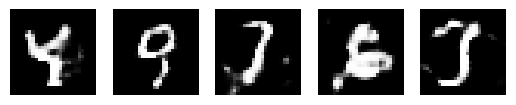

4/4 [==============================] - 0s 4ms/step
Epoch 5125, D Loss: 0.5435563921928406, G Loss: 1.1459996700286865
4/4 [==============================] - 0s 5ms/step


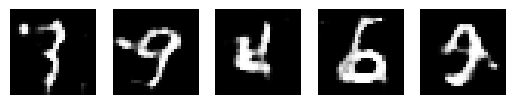

4/4 [==============================] - 0s 4ms/step
Epoch 5250, D Loss: 0.49865351617336273, G Loss: 1.485799789428711
4/4 [==============================] - 0s 4ms/step


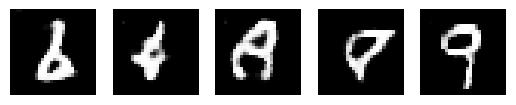

4/4 [==============================] - 0s 3ms/step
Epoch 5375, D Loss: 0.5328115224838257, G Loss: 1.47993803024292
4/4 [==============================] - 0s 4ms/step


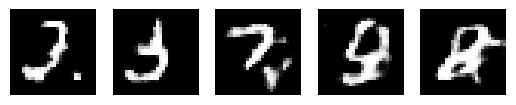

4/4 [==============================] - 0s 3ms/step
Epoch 5500, D Loss: 0.4742599278688431, G Loss: 1.7188301086425781
4/4 [==============================] - 0s 5ms/step


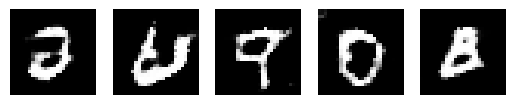

4/4 [==============================] - 0s 4ms/step
Epoch 5625, D Loss: 0.4993036985397339, G Loss: 1.4924982786178589
4/4 [==============================] - 0s 3ms/step


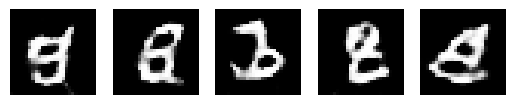

4/4 [==============================] - 0s 6ms/step
Epoch 5750, D Loss: 0.4593249708414078, G Loss: 1.4054621458053589
4/4 [==============================] - 0s 4ms/step


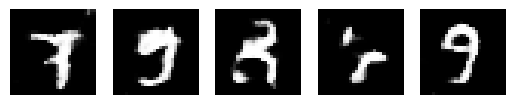

4/4 [==============================] - 0s 3ms/step
Epoch 5875, D Loss: 0.5173531472682953, G Loss: 1.4867891073226929
4/4 [==============================] - 0s 5ms/step


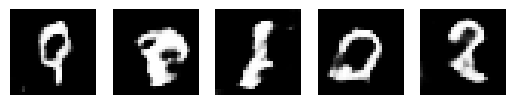

4/4 [==============================] - 0s 4ms/step
Epoch 6000, D Loss: 0.5334754437208176, G Loss: 1.396217703819275
4/4 [==============================] - 0s 2ms/step


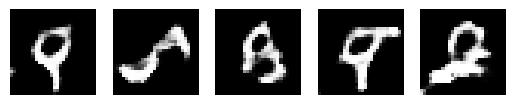

4/4 [==============================] - 0s 4ms/step
Epoch 6125, D Loss: 0.5670958757400513, G Loss: 1.3629511594772339
4/4 [==============================] - 0s 3ms/step


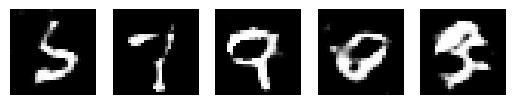

4/4 [==============================] - 0s 3ms/step
Epoch 6250, D Loss: 0.5791324079036713, G Loss: 1.3761554956436157
4/4 [==============================] - 0s 4ms/step


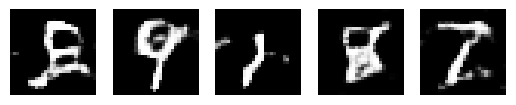

4/4 [==============================] - 0s 2ms/step
Epoch 6375, D Loss: 0.5493947565555573, G Loss: 1.5153769254684448
4/4 [==============================] - 0s 2ms/step


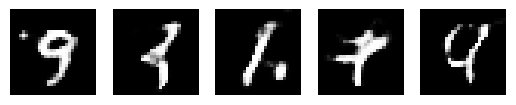

4/4 [==============================] - 0s 5ms/step
Epoch 6500, D Loss: 0.487138569355011, G Loss: 1.5812861919403076
4/4 [==============================] - 0s 4ms/step


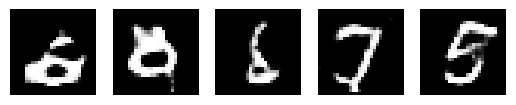

4/4 [==============================] - 0s 3ms/step
Epoch 6625, D Loss: 0.5711925029754639, G Loss: 1.5205157995224
4/4 [==============================] - 0s 5ms/step


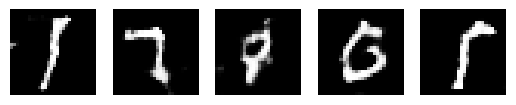

4/4 [==============================] - 0s 5ms/step
Epoch 6750, D Loss: 0.4915216714143753, G Loss: 1.4562090635299683
4/4 [==============================] - 0s 3ms/step


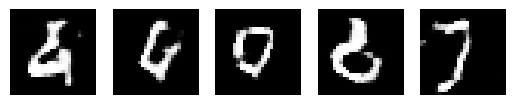

4/4 [==============================] - 0s 4ms/step
Epoch 6875, D Loss: 0.4875311553478241, G Loss: 1.425158977508545
4/4 [==============================] - 0s 3ms/step


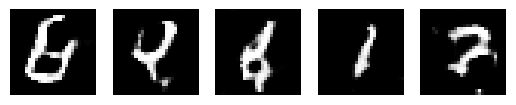

4/4 [==============================] - 0s 5ms/step
Epoch 7000, D Loss: 0.5001506060361862, G Loss: 1.3484262228012085
4/4 [==============================] - 0s 5ms/step


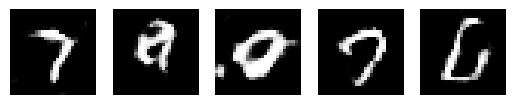

4/4 [==============================] - 0s 6ms/step
Epoch 7125, D Loss: 0.5010281652212143, G Loss: 1.2817517518997192
4/4 [==============================] - 0s 5ms/step


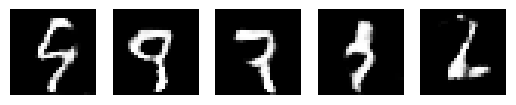

4/4 [==============================] - 0s 5ms/step
Epoch 7250, D Loss: 0.49830642342567444, G Loss: 1.3101162910461426
4/4 [==============================] - 0s 5ms/step


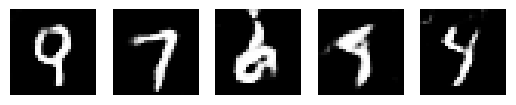

4/4 [==============================] - 0s 2ms/step
Epoch 7375, D Loss: 0.47504179179668427, G Loss: 1.4398170709609985
4/4 [==============================] - 0s 5ms/step


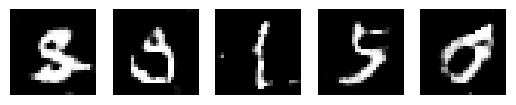

4/4 [==============================] - 0s 5ms/step
Epoch 7500, D Loss: 0.44747306406497955, G Loss: 1.4090049266815186
4/4 [==============================] - 0s 5ms/step


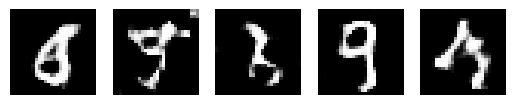

4/4 [==============================] - 0s 5ms/step
Epoch 7625, D Loss: 0.5542758405208588, G Loss: 1.4769688844680786
4/4 [==============================] - 0s 3ms/step


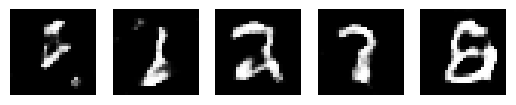

4/4 [==============================] - 0s 3ms/step
Epoch 7750, D Loss: 0.6013829410076141, G Loss: 1.3393644094467163
4/4 [==============================] - 0s 3ms/step


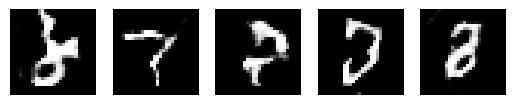

4/4 [==============================] - 0s 4ms/step
Epoch 7875, D Loss: 0.4633757174015045, G Loss: 1.4239263534545898
4/4 [==============================] - 0s 6ms/step


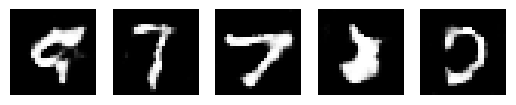

4/4 [==============================] - 0s 3ms/step
Epoch 8000, D Loss: 0.5549046993255615, G Loss: 1.3389872312545776
4/4 [==============================] - 0s 3ms/step


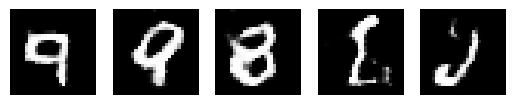

4/4 [==============================] - 0s 5ms/step
Epoch 8125, D Loss: 0.4763209670782089, G Loss: 1.2897770404815674
4/4 [==============================] - 0s 3ms/step


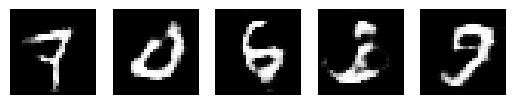

4/4 [==============================] - 0s 4ms/step
Epoch 8250, D Loss: 0.6065829992294312, G Loss: 1.2717387676239014
4/4 [==============================] - 0s 5ms/step


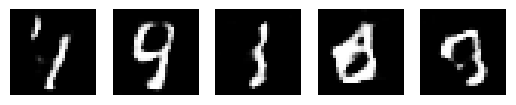

4/4 [==============================] - 0s 6ms/step
Epoch 8375, D Loss: 0.5944935083389282, G Loss: 1.3269178867340088
4/4 [==============================] - 0s 5ms/step


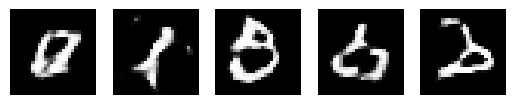

4/4 [==============================] - 0s 5ms/step
Epoch 8500, D Loss: 0.5594356656074524, G Loss: 1.285855770111084
4/4 [==============================] - 0s 5ms/step


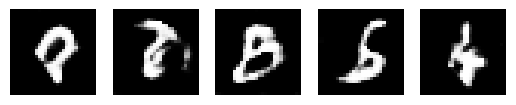

4/4 [==============================] - 0s 5ms/step
Epoch 8625, D Loss: 0.4554806500673294, G Loss: 1.4150068759918213
4/4 [==============================] - 0s 6ms/step


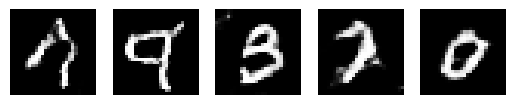

4/4 [==============================] - 0s 5ms/step
Epoch 8750, D Loss: 0.5495891571044922, G Loss: 1.452873706817627
4/4 [==============================] - 0s 4ms/step


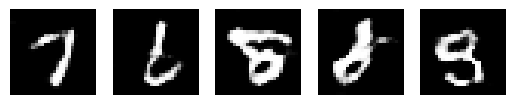

4/4 [==============================] - 0s 5ms/step
Epoch 8875, D Loss: 0.5183635801076889, G Loss: 1.467284917831421
4/4 [==============================] - 0s 5ms/step


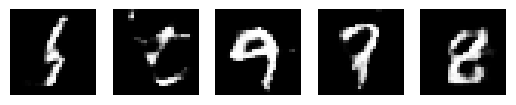

4/4 [==============================] - 0s 5ms/step
Epoch 9000, D Loss: 0.5221856534481049, G Loss: 1.3486042022705078
4/4 [==============================] - 0s 2ms/step


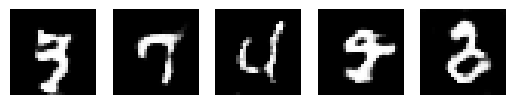

4/4 [==============================] - 0s 3ms/step
Epoch 9125, D Loss: 0.6138527393341064, G Loss: 1.31930673122406
4/4 [==============================] - 0s 3ms/step


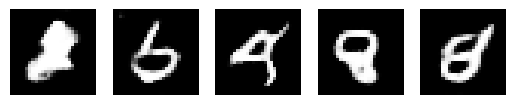

4/4 [==============================] - 0s 5ms/step
Epoch 9250, D Loss: 0.5152794122695923, G Loss: 1.3000388145446777
4/4 [==============================] - 0s 2ms/step


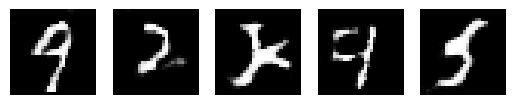

4/4 [==============================] - 0s 4ms/step
Epoch 9375, D Loss: 0.5198615789413452, G Loss: 1.351830005645752
4/4 [==============================] - 0s 6ms/step


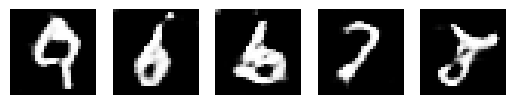

4/4 [==============================] - 0s 5ms/step
Epoch 9500, D Loss: 0.5003472566604614, G Loss: 1.3964200019836426
4/4 [==============================] - 0s 6ms/step


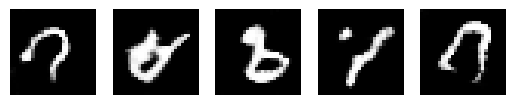

4/4 [==============================] - 0s 4ms/step
Epoch 9625, D Loss: 0.5430509150028229, G Loss: 1.5321805477142334
4/4 [==============================] - 0s 6ms/step


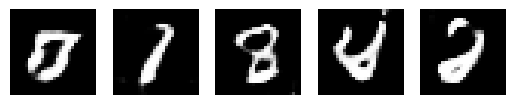

4/4 [==============================] - 0s 7ms/step
Epoch 9750, D Loss: 0.569457620382309, G Loss: 1.197485327720642
4/4 [==============================] - 0s 6ms/step


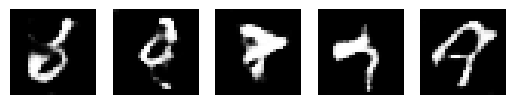

4/4 [==============================] - 0s 3ms/step
Epoch 9875, D Loss: 0.5197295993566513, G Loss: 1.420346975326538
4/4 [==============================] - 0s 6ms/step


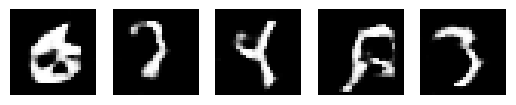

4/4 [==============================] - 0s 5ms/step


In [ ]:
for epoch in range(epochs):
  #entrenamiento del discriminador
  idx = np.random.randint(0, train_images.shape[0], batch_size) # Crear un valor randomico para escoger las imagenes a pasar
  real_images = train_images[idx] # coger aleatoriamente muestras
  noise = np.random.normal(0, 1, (batch_size, latent_dim)) # crear el ruido con una distribucion normal, y definirlo valores entre cero y uno y el lote de imagenes que le entreo y el espacio latente defiicio
  generated_images = generator.predict(noise) # usa la informacion del generador y lo convierte en prediccion
  real_labels = np.ones((batch_size, 1)) # las entradas del discriminador va a tener el ruido
  fake_labels = np.zeros((batch_size, 1)) # entradas realies van a tener el siguiente tamaño

  d_loss_real = discriminator.train_on_batch(real_images, real_labels) # calcula la funcion de perdida del discriminador en relacion a los datos reales y las etiquetas reales
  d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels) # calcula la funcion de perdida del discriminador en relacion a los datos sinteticos
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake) # Formula de la funcion real suma las dos perdidas y las suma en dos y saca el promedio

  #Entrenamiento del generador
  noise = np.random.normal(0, 1, (batch_size, latent_dim)) # genera el ruido normal
  g_loss = gan.train_on_batch(noise, real_labels) # funcion de perdida del generador contra el lote y recibe el ruido y las etiquetas reales del discriminador

  if epoch % sample_interval == 0: # para cada epoca modular %
    print(f'Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}') # cantidad de epocas que lleva la funciones creadas
    # Generar imagenes de emjemplo
    generated_images = generator.predict(noise) # pintar las imagenes generadas
    generated_images = 0.5 * generated_images + 0.5 # Reescalar imagenes a [0, 1]
    fig, axs = plt.subplots(1,5)
    for i in range(5): # cuanto se demora en pasar el conjunto de entrenamiento en mi conjunto
      axs[i].imshow(generated_images[i, :, :, 0], cmap='gray')
      axs[i].axis('off')
    plt.show()


In [ ]:
# Guardar el modelo entrenado
generator.save('generator_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# cargarlo en el drive despues de guardado
generator = tf.keras.models.load_model('/content/drive/MyDrive/Aprendizaje automatico/generator_model.h5')

# **Parte 2: Análisis de Resultados**

1. Visualización del progreso: utilizando los tres últimos dígitos de su código estudiantill como intervalo,
haga que su implementación genere ejemplos (muestras) que permitan observar el progreso del
entrenamiento.

2. Análisis de pérdida: Genere las curvas de pérdida del generador y el discriminador a lo largo del
entrenamiento, ¿Qué patrones observa? ¿Cómo cambian las perdidas a medida que avanza el
entrenamiento?

In [ ]:
d_loses = []
g_loses = []


In [ ]:
genera_imagen = None

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loses(d_loses, g_loses):
  plt.figure(figsize = (10,5))
  plt.plot(d_loses, label = "Loss del discriminador", color="red")
  plt.plot(g_loses, label="Loss del generador", color="yello")
  plt.title("Pérdida del Generador y Discriminador")
  plt.xlabel("Intervalo")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

3. Exploración del espacio latente: Seleccione una imagen generada y experimenten con la
modificación de valores en el espacio latente. ¿Cómo cambian las imágenes generadas al ajustar
ciertas dimensiones del espacio latente?

In [ ]:
# Buscar un ruido no aleatorio y que yo pueda cambiarlo y explicar las implicaciones que tienen en la generacion de imagenes

import numpy as np

num_samples = 20 # cantidad de imagenes que deseo generar
latent_dim = 100 # Dimension del espacio latente

noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_images = generator.predict(noise)

1/1 [==============================] - 0s 68ms/step


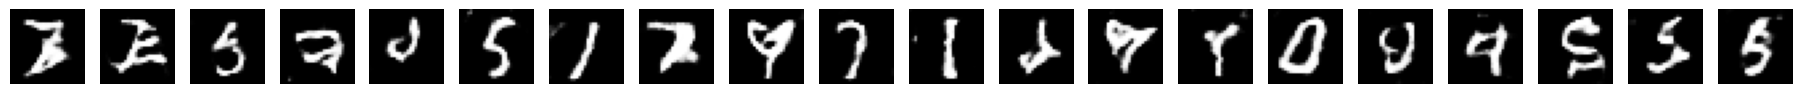

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, num_samples, figsize=(23, 2))
for i in range(num_samples):
  axs[i].imshow(generated_images[i, :, :, 0], cmap='gray')
  axs[i].axis('off')
plt.show()